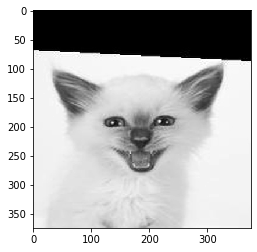

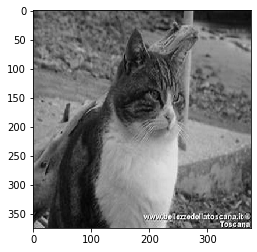

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random


TRAIN_DIR = "Train_3"
TEST_DIR = "Test_2"
CATEGORIES = ["Train_Cat", "Train_Dog"]
CATEGORIES_2 = ["Test_Cat", "Test_Dog"]
IMG_SIZE=375

for category in CATEGORIES:  
    path = os.path.join(TRAIN_DIR,category)  
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
    
for category_2 in CATEGORIES_2:  # do dogs and cats
    path = os.path.join(TEST_DIR,category_2)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

cat_dog = 'dogsvscats-{}-{}.model'.format(0.01, '2conv-basic') # just so we remember which saved model is which, sizes must match

In [2]:
def label_img(img):
    word_label = img.split('.')[-3]
    # conversion to one-hot array [cat,dog]
    #                            [much cat, no dog]
    if word_label == 'cat': return 1
    #                             [no cat, very doggo]
    elif word_label == 'dog': return -1
    
def create_training_data():
    training_data = []
    for category in CATEGORIES:  # do dogs and cats
        
        path = os.path.join(TRAIN_DIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (-1 or a 1). -1=dog 1=cat
        #if(class_num==0.0):
            #class_num=-1.0
        #else:
            #class_num=1
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            label = label_img(img)
            try:    
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([np.array(img_array), np.array(class_num)])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
    random.shuffle(training_data)
    np.save('train_data.npy', training_data)   
    return training_data
    
train_data=create_training_data()

print(len(train_data))

100%|██████████| 10119/10119 [00:21<00:00, 462.41it/s]


20238


In [3]:
def create_test_data():
    testing_data = []
    for category_2 in CATEGORIES_2:       
        path = os.path.join(TEST_DIR,category_2)
        class_num=CATEGORIES_2.index(category_2)
        
        for img in tqdm(os.listdir(path)):
            label = label_img(img)
            
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                testing_data.append([np.array(img_array), class_num])        
            except Exception as e:
                pass
            
    random.shuffle(testing_data) #karistirir
    np.save('test_data.npy', testing_data)    
    return testing_data

In [4]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tensorflow as tf
tf.reset_default_graph()

#None herhangi bir sayida ornek oldugu icin
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

#convnet = tflearn.activations.leaky_relu (convnet, alpha=1,name='LeakyReLU')
convnet = conv_2d(convnet, 16, 5,  activation='tanh')
convnet = max_pool_2d(convnet, 5)

#convnet = tflearn.activations.leaky_relu (convnet, alpha=1,name='LeakyReLU')
convnet = conv_2d(convnet, 32, 5,   activation='tanh')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation ='tanh') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='tanh') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='tanh') 
convnet = max_pool_2d(convnet, 5) 

#convnet = tflearn.activations.leaky_relu (convnet, alpha=1,name='LeakyReLU')
convnet = fully_connected(convnet, 1024, activation='tanh')
convnet = dropout(convnet, 0.8)

convnet = tflearn.activations.leaky_relu (convnet, alpha=1,name='LeakyReLU')
convnet = fully_connected(convnet, 1, activation='leaky_relu')
#convnet = regression(convnet, optimizer='Adam', learning_rate=0.1, 
#loss='categorical_crossentropy', metric='accuracy', name='targets')
convnet = regression(convnet, optimizer='adam', learning_rate=1e-3,
                     loss='mean_square', name='target')

#convnet = fully_connected(convnet, 2, activation='softmax')
#convnet = regression(convnet, optimizer='adam', learning_rate=0.01, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')
print('okey')

C:\Users\user\Anaconda2\envs\tez\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda2\envs\tez\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda2\envs\tez\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda2\envs\tez\lib\site-packages\tensorflow\python\framework\dty

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
okey


In [5]:
#if os.path.exists('{}.meta'.format(cat_dog)):
#    #model.load(MODEL_NAME_1, weights_only=True)
#    model.load(cat_dog)
#    print('model loaded!')

In [6]:
X = np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train_data]

Y = np.reshape(Y, (-1, 1))

In [37]:
model.fit(X, Y, n_epoch=40, batch_size=500, validation_set=0.001, snapshot_step=None,  
   
          show_metric=True,  run_id=cat_dog)

Training Step: 1639  | total loss: 0.03592 | time: 1358.282s
| Adam | epoch: 040 | loss: 0.03592 - binary_acc: 0.8880 -- iter: 20000/20217
Training Step: 1640  | total loss: 0.03391 | time: 1395.163s
| Adam | epoch: 040 | loss: 0.03391 - binary_acc: 0.8976 | val_loss: 0.09730 - val_acc: 0.9524 -- iter: 20217/20217
--


In [94]:
cat_dog = 'G19_Cagla_Tasarim_model'
model.save(cat_dog)

INFO:tensorflow:C:\Users\user\G19_Cagla_Tasarim_model is not in all_model_checkpoint_paths. Manually adding it.


In [74]:
import matplotlib.pyplot as plt

#test_data = create_test_data()
acc=0
#predict=list(6000) #define predıct as array of 6000x1
prediction=np.empty((6000,1))

test_Y = [i[1] for i in test_data]

#fig=plt.figure(figsize=(16, 12))

for num, data in enumerate(test_data):
    
    img_num = data[1]
    img_data = data[0]
    #y = fig.add_subplot(4, 4, num+1)
    #orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    model_out = model.predict([data])[0]
    if model_out>=0.3: prediction[num]=1
    else: prediction[num]=0      
    if prediction[num]==test_Y[num]: acc=acc+1
     
    #model_out_label = model.predict_label([data])[0]
    #print(model_out)
 #tflearn.objectives.softmax_categorical_crossentropy (img_num,model_out)
print(acc/6000)


0.866
